# <ins>NETTOYAGE ET VECTORIZATION DE LA COLONNE TEXTE</ins>

#### Jusqu'ici, nous avons:

- procédé à la concatenation des colonnes 'designation' et 'description'
- supprimé les données en doubles
- séléctionné les produits ayant une description en français et en anglais.
- sélectionné les desciptions françaises et anglaises
  
#### Nous allons maintenant procéder à la préparation de la colonne 'produit'en effectuant les opérations suivantes :

- suppression des ponctuations, des majuscules et des chiffres
- lemmatisation (regrouper les mots ayant le même sens)
- suppression des stopwords
- suppresion des balises html
- tokenisation des phrases (découpe des phrases en mots) mots)

## <ins>IMPORT DES DEPENDANCES ET DU DATASET</ins>

In [49]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from bs4 import BeautifulSoup


In [10]:
df = pd.read_csv('df_fr_en.csv')

df.head()

,productid,imageid,prdtypecode,produit,langue
0,436067568,1008141237,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,fr
1,201115110,938777978,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,fr
2,50418756,457047496,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,en
3,278535884,1077757786,2705,La Guerre Des Tuques Luc a des id&eacute;es de...,fr
4,5862738,393356830,2280,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,fr


## <ins>PREPARATION DATASET</ins>

In [18]:
# Passage de nos colonnes produits en string
df[['produit','langue']].astype(str)

# Remplacement fr en french et en en english pour la fonction à venir et la dépendance NLTK
df.langue = df.langue.replace('en', "english")
df.langue = df.langue.replace('fr', "french")

df.head()

,productid,imageid,prdtypecode,produit,langue
0,436067568,1008141237,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,french
1,201115110,938777978,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,french
2,50418756,457047496,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,english
3,278535884,1077757786,2705,La Guerre Des Tuques Luc a des id&eacute;es de...,french
4,5862738,393356830,2280,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,french


In [14]:
# Chargement des éléments de la biblio NTLK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
def pretraitement_texte(texte, langue):
    
    preprocess_list = []
    
    lemmatizer = WordNetLemmatizer()               
         
    for mots, langues in zip(texte, langue) :

        if langues == "english":        
            stop_words = set(stopwords.words('english'))        
        else:
            stop_words = set(stopwords.words('french'))
            
        # Suppression des balises HTML
        mots = BeautifulSoup(mots, 'html.parser').get_text()
        
        # Remplacement des apostrophes et ° par des espaces
        mots = mots.replace("'", " ")
        mots = mots.replace("°", " ")
        
        # Convertir en minuscules
        mots = mots.lower()
                
        # Supprimer les chiffres en conservant années (4chiffres qui se suivent at n°de série)
        mots = re.sub(r'\b(?!(\d{4}|[A-Z]{3}\d{3})\b)\d+\b', '', mots)

        # Supprimer la ponctuation et prendre les mots de plus de 2 acractères
        mots = "".join([i for i in mots if i not in string.punctuation])

        # Tokeniser
        tokenize_mots = word_tokenize(mots, language=langues)
        
        # Supprimer les stopwords
        mots = [i for i in tokenize_mots if i not in stop_words and len(i) > 2]
        
        # Lemmatisation
        mots = [lemmatizer.lemmatize(i) for i in mots]
        
        # Rejoindre les mots traités
        mots_clean = ' '.join(mots)

        preprocess_list.append(mots_clean)
        
    return preprocess_list

In [31]:
pretraitement_liste = pretraitement_texte(df['produit'], df['langue'])

C:\Users\antoi\AppData\Local\Temp\ipykernel_22572\2702126469.py:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  mots = BeautifulSoup(mots, 'html.parser').get_text()


## <ins>TEST DE NOTRE FONCTION DE PRETRAITEMENT</ins>

In [32]:

print('Phrase de base français : ', end = "\n\n")
print(df['produit'][0],  end = "\n\n")

print('Phrase nettoyée français : ', end = "\n\n")
print(pretraitement_liste[0], end = "\n\n")

print("-"*40)

print('Phrase de base anglais : ', end = "\n\n")
print(df['produit'][2],  end = "\n\n")

print('Phrase nettoyée anglais : ', end = "\n\n")
print(pretraitement_liste[2], end = "\n\n")


Phrase de base français : 

Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans. 

Phrase nettoyée français : 

journal art 2001 art marche salon art asiatique paris jacques barrere francois perrier reforme ventes encheres publiques sna fete cent an

----------------------------------------
Phrase de base anglais : 

Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt) 

Phrase nettoyée anglais : 

peluche donald europe disneyland 2000 marionnette doigt



## <ins>Sauvegarde</ins>

In [ ]:
# CREATIONS D UNE COLONNE PRODUIT CLEAN CONTENANT NOS DONNEES TEXTUELLES NETOYEES
df['produit_clean'] = pretraitement_liste
# SUPPRESSION DE L'ANCIENNCE COLONNE
df = df.drop(['produit'], axis = 1)

In [41]:
# SAUVEGARDE
df.to_csv('df_texte_clean.csv')

## <ins>Décompte des mots</ins>

In [42]:
df.head()

,productid,imageid,prdtypecode,langue,produit_clean
0,436067568,1008141237,2280,french,journal art 2001 art marche salon art asiatiqu...
1,201115110,938777978,50,french,grand stylet ergonomique bleu gamepad nintendo...
2,50418756,457047496,1280,english,peluche donald europe disneyland 2000 marionne...
3,278535884,1077757786,2705,french,guerre tuques luc idées grandeur veut organise...
4,5862738,393356830,2280,french,afrique contemporaine hiver 2004 dossier japon...


In [43]:
from collections import Counter

# Décompte des mots uniques
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] +=1
    return count

counter = counter_word(df.produit_clean)

In [44]:
print("Il y a {} mots uniques".format(len(counter)))

Il y a 217671 mots uniques


In [52]:
# Top 30 des mots présents
top_30 = counter.most_common(30)

top_30

[('couleur', 22993),
 ('taille', 22638),
 ('plus', 21634),
 ('piscine', 20988),
 ('peut', 20291),
 ('eau', 18354),
 ('haute', 17936),
 ('qualité', 15983),
 ('être', 15489),
 ('dimension', 13246),
 ('facile', 12472),
 ('enfants', 12384),
 ('tout', 12160),
 ('matériel', 11960),
 ('sans', 11629),
 ('produit', 11465),
 ('jeu', 10828),
 ('bois', 10712),
 ('acier', 10167),
 ('caractéristiques', 9637),
 ('oreiller', 9559),
 ('type', 9552),
 ('comme', 9290),
 ('plaît', 9100),
 ('coussin', 8770),
 ('lumière', 8735),
 ('comprend', 8554),
 ('sac', 8407),
 ('non', 8334),
 ('très', 8309)]

In [72]:
mots_10 = []
for i in range(10):
    mots_10.append(top_30[i][0])
    
value_10 = []
for i in range(10):
    value_10.append(top_30[i][1])

In [73]:
mots_10

['couleur',
 'taille',
 'plus',
 'piscine',
 'peut',
 'eau',
 'haute',
 'qualité',
 'être',
 'dimension']

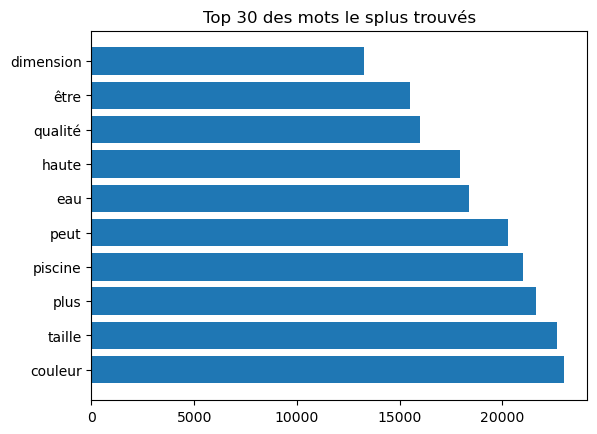

In [74]:
import matplotlib.pyplot

plt.figure()
plt.barh(mots_10, value_10)
plt.title('Top 10 des mots le splus trouvés')
plt.show();